##### URLs

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>url</th>
      <th>checkbox</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>10</th>
      <td><a href="https://player.vimeo.com/video/656793909?h=fca67856b4">https://player.vimeo.com/video/656793909?h=fca67856b4</a></td>
      <td><input type="checkbox"></td>
    </tr>
    <tr>
      <th>11</th>
      <td><a href="https://player.vimeo.com/video/656793812?h=810161b84e">https://player.vimeo.com/video/656793812?h=810161b84e</a></td>
      <td><input type="checkbox"></td>
    </tr>
    <tr>
      <th>12</th>
      <td><a href="https://player.vimeo.com/video/656793718?h=1e2a1e1de8">https://player.vimeo.com/video/656793718?h=1e2a1e1de8</a></td>
      <td><input type="checkbox"></td>
    </tr>
    <tr>
      <th>13</th>
      <td><a href="https://player.vimeo.com/video/656797021?h=dc90e6dac3">https://player.vimeo.com/video/656797021?h=dc90e6dac3</a></td>
      <td><input type="checkbox"></td>
    </tr>
    <tr>
      <th>14</th>
      <td><a href="https://player.vimeo.com/video/656799309?h=a7130deb64">https://player.vimeo.com/video/656799309?h=a7130deb64</a></td>
      <td><input type="checkbox"></td>
    </tr>
    <tr>
      <th>15</th>
      <td><a href="https://player.vimeo.com/video/656798530?h=9a9350eff1">https://player.vimeo.com/video/656798530?h=9a9350eff1</a></td>
      <td><input type="checkbox"></td>
    </tr>
  </tbody>
</table>

#### Prerequiste
- Meta Data
- Importing Libraries
- Importing Data

<p style="color:orange; font-size:30px">Goals for this Lesson</p>

- Build a model to predict apartment price based on neighborhood
- Encode categorical data to train a linear model
- Battle overfitting using regularization

<p style="color:orange">Machine Learning Workflow</p>

- Prepare Data:
    - Import Data
    - Explore: Extract neighborhood from string
    - Split Fields
- Build Model: 
    - Baseline
    - Iterate: One-hot Encoding
    - Evaluate: Overfitting
- Communicate Results
    - Curse of Dimensionality
    - Regularization: Ridge Regression
    - Bar Charts for Coefficients

In [7]:
import warnings
from glob import glob   
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from category_encoders import OneHotEncoder #Easier to use than scikit-learn OneHotEncoder
# from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)


<p style="color:orange; font-size:30px">Data Wrangling</p>

In [8]:
from data_wrangling_pipeline import wrangle, input_for_matplotlib
files = glob("data/buenos-aires-real-estate-*.csv")
files

['data\\buenos-aires-real-estate-1.csv',
 'data\\buenos-aires-real-estate-2.csv',
 'data\\buenos-aires-real-estate-3.csv',
 'data\\buenos-aires-real-estate-4.csv',
 'data\\buenos-aires-real-estate-5.csv']

In [9]:
frames=[]
for filepath in files:
    df = wrangle(filepath)
    frames.append(df)

In [10]:
df = pd.concat(frames, axis=0)
df

,price_aprox_usd,surface_covered_in_m2,lat,lon,neighborhood
4,129000.0,70.0,-34.584651,-58.454693,Chacarita
9,87000.0,42.0,-34.638979,-58.500115,Villa Luro
29,118000.0,54.0,-34.615847,-58.459957,Caballito
40,57000.0,42.0,-34.625222,-58.382382,Constitución
41,90000.0,50.0,-34.610610,-58.412511,Once
...,...,...,...,...,...
8566,290000.0,83.0,-34.639528,-58.519666,Liniers
8573,150000.0,45.0,-34.597825,-58.416439,Palermo
8577,65000.0,42.0,-34.652233,-58.490739,Mataderos
8578,91440.0,48.0,-34.648761,-58.500180,Mataderos


#### Exploratory Data Analysis

In [11]:
df.head()

,price_aprox_usd,surface_covered_in_m2,lat,lon,neighborhood
4,129000.0,70.0,-34.584651,-58.454693,Chacarita
9,87000.0,42.0,-34.638979,-58.500115,Villa Luro
29,118000.0,54.0,-34.615847,-58.459957,Caballito
40,57000.0,42.0,-34.625222,-58.382382,Constitución
41,90000.0,50.0,-34.610610,-58.412511,Once


<p style="color:orange">Splitting Data</p>

In [12]:
features = ["neighborhood"]
y_train = df["price_aprox_usd"]
X_train = df[features]
print(y_train.shape)
print(X_train.shape)

(6582,)
(6582, 1)


In [13]:
y_mean = y_train.mean()
y_pred_baseline= [y_mean]*len(y_train)
print(f"Mean apartment price: {y_mean}")
print(f"Baseline MAE: {mean_absolute_error(y_train,y_pred_baseline)}")

Mean apartment price: 132383.83701458524
Baseline MAE: 44860.10834274133


<p style="color:orange; font-size:30px">Encoding Categorical Data</p>

In [14]:
X_train["neighborhood"]

4          Chacarita
9         Villa Luro
29         Caballito
40      Constitución
41              Once
            ...     
8566         Liniers
8573         Palermo
8577       Mataderos
8578       Mataderos
8597       Monserrat
Name: neighborhood, Length: 6582, dtype: object

In [15]:
#Instantiate
ohe = OneHotEncoder(use_cat_names=True)
#Fit
ohe.fit(X_train)
#Transform
XT_train = ohe.transform(X_train)
print(XT_train.shape)
XT_train

(6582, 57)


,neighborhood_Chacarita,neighborhood_Villa Luro,neighborhood_Caballito,neighborhood_Constitución,neighborhood_Once,neighborhood_Almagro,neighborhood_Palermo,neighborhood_Flores,neighborhood_Belgrano,neighborhood_Liniers,...,neighborhood_Puerto Madero,neighborhood_Agronomía,neighborhood_Monte Castro,neighborhood_Tribunales,neighborhood_Villa Santa Rita,neighborhood_Velez Sarsfield,neighborhood_Villa Soldati,neighborhood_Villa Real,neighborhood_Pompeya,neighborhood_Catalinas
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8566,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8573,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Machine Learning

In [16]:
#Instantiating a model
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    Ridge()
)
model.fit(X_train, y_train)

,steps,"[('onehotencoder', ...), ('ridge', ...)]"
,transform_input,None
,memory,None
,verbose,False
,verbose,0
,cols,['neighborhood']
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,use_cat_names,True


In [17]:
# Mean absolute error
y_pred_training = model.predict(X_train)
mae_training = mean_absolute_error(y_train,y_pred_training)
print(f"Training MAE: {round(mae_training, 2)}")

Training MAE: 39350.22


In [18]:
# Extract Coefficient

intercept = model.named_steps["ridge"].intercept_
coefficients = model.named_steps["ridge"].coef_
print("coefficients len: ", len(coefficients))
print(coefficients[:5])

coefficients len:  57
[-2.89895934e+03 -6.29555347e+00  9.25289088e+03 -4.17487330e+04
 -3.23037446e+03]


In [19]:
feature_names = model.named_steps["onehotencoder"].get_feature_names()
print(feature_names[:5])

['neighborhood_Chacarita' 'neighborhood_Villa Luro'
 'neighborhood_Caballito' 'neighborhood_Constitución' 'neighborhood_Once']


In [20]:
feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp.head()

neighborhood_Chacarita       -2898.959335
neighborhood_Villa Luro         -6.295553
neighborhood_Caballito        9252.890876
neighborhood_Constitución   -41748.733031
neighborhood_Once            -3230.374461
dtype: float64

In [21]:
print(f"price = {intercept.round(2)}")
for f,c in feat_imp.items():
    print(f"+ ({round(c,2)} * {f})")

price = 118524.65
+ (-2898.96 * neighborhood_Chacarita)
+ (-6.3 * neighborhood_Villa Luro)
+ (9252.89 * neighborhood_Caballito)
+ (-41748.73 * neighborhood_Constitución)
+ (-3230.37 * neighborhood_Once)
+ (2903.34 * neighborhood_Almagro)
+ (45934.41 * neighborhood_Palermo)
+ (-8662.28 * neighborhood_Flores)
+ (46954.21 * neighborhood_Belgrano)
+ (-13729.1 * neighborhood_Liniers)
+ (6277.05 * neighborhood_Villa Crespo)
+ (-10678.63 * neighborhood_San Cristobal)
+ (-7974.66 * neighborhood_Congreso)
+ (14701.16 * neighborhood_Saavedra)
+ (-11172.55 * neighborhood_Balvanera)
+ (-29585.61 * neighborhood_Parque Avellaneda)
+ (72740.78 * neighborhood_Recoleta)
+ (5638.47 * neighborhood_San Telmo)
+ (42831.32 * neighborhood_Nuñez)
+ (55590.93 * neighborhood_Barrio Norte)
+ (-6323.68 * neighborhood_Parque Centenario)
+ (4330.55 * neighborhood_Abasto)
+ (-7905.29 * neighborhood_Centro / Microcentro)
+ (-19370.74 * neighborhood_)
+ (-7108.23 * neighborhood_Paternal)
+ (-21078.78 * neighborhood_Ma

#### Visualization

Text(0.5, 1.0, 'Feature Importance for Apartment Price')

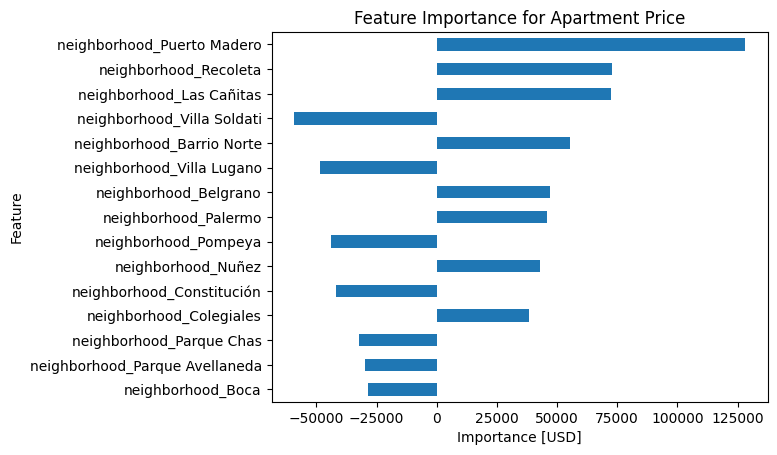

In [22]:
feat_imp.sort_values(key=abs).tail(15).plot(kind="barh")
plt.xlabel("Importance [USD]")
plt.ylabel("Feature")
plt.title("Feature Importance for Apartment Price")